# Session 7: Introduction to ML - Classification

## Demo 2: Classification on Toy Dataset 2 (Titanic)

Classification using the Dataset from Kaggle (https://www.kaggle.com/c/titanic/data). The data file is provided to you and please put the folder "data_titanic" in the same folder as this jupyter notebook.

In [1]:
import sklearn
from sklearn import *
sklearn.__version__

'0.21.2'

In [2]:
import pandas #we also need pandas package here to load the csv data

# Load dataset
data = titanic_data = pandas.read_csv('data/titanic_train.csv')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
le_gender = sklearn.preprocessing.LabelEncoder()
data['binary_gender'] = le_gender.fit_transform(titanic_data['Sex'].values)
selected_features = ['Pclass','Age', 'SibSp', 'Parch', 'Fare','binary_gender']
X = data[selected_features].fillna(0).values
y = data['Survived'].values
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,binary_gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [4]:
# Split into training and testing data (72/25 by default)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=0)

### 1. Logistic regression model

In [16]:

# Split into training and testing data (72/25 by default)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=0)

# Run Logistic regression
logreg = sklearn.linear_model.LogisticRegression().fit(X_train, y_train)

# Print the results
print("Logistic Regression: Training accuracy: {:.3f}".format(logreg.score(X_train, y_train)))
print("Logistic Regression: Testing accuracy: {:.3f}".format(logreg.score(X_test, y_test)))

print("intercept"+str(logreg.intercept_))
print("coefficients:"+str(logreg.coef_[0]))

Logistic Regression: Training accuracy: 0.798
Logistic Regression: Testing accuracy: 0.785
intercept[2.91618651]
coefficients:[-0.69589872 -0.0112715  -0.3006428  -0.00316545  0.00393633 -2.48251094]


C:\Users\patax\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 2. Decision tree model

In [6]:
# Run decision tree
tree = sklearn.tree.DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
print("Decision Tree: Training accuracy: {:.3f}".format(tree.score(X_train, y_train)))
print("Decision Tree: Testing accuracy: {:.3f}".format(tree.score(X_test, y_test)))

Decision Tree: Training accuracy: 0.981
Decision Tree: Testing accuracy: 0.803


#### 2.1 Explore feature importance and tree

In [7]:
print(selected_features)
print(tree.feature_importances_)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'binary_gender']
[0.08378072 0.2212009  0.02726009 0.04508146 0.30735518 0.31532165]


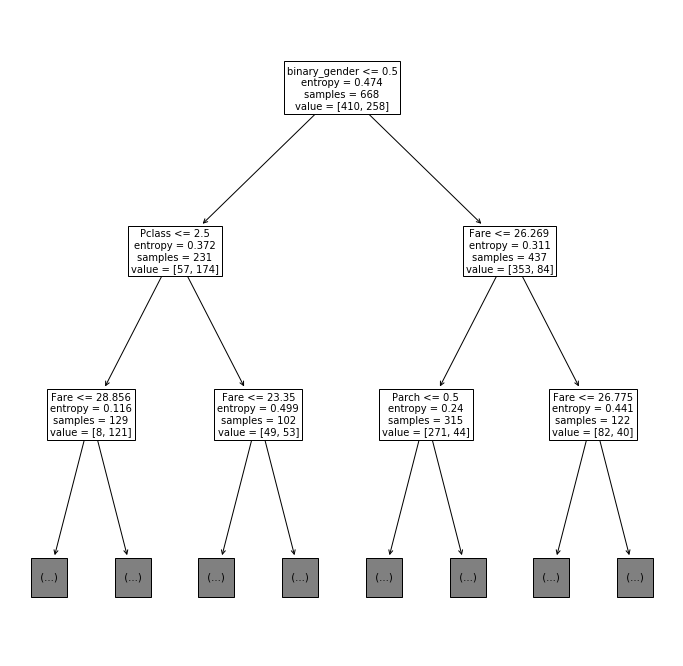

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
sklearn.tree.plot_tree(tree, feature_names=selected_features, fontsize=10, max_depth=2)
plt.show()

#### 2.2 Performing prediction from the trained (fitted) model

In [9]:
#Note: input features = ['Pclass','Age', 'SibSp', 'Parch', 'Fare','binary_gender']
jack = [3., 19., 0., 0., 5.0, 1.0]
rose = [1., 17., 1., 2., 100.0, 0.0]

print([jack,rose])

# Predict surviving chances
survivor_predictions = tree.predict([jack, rose])
print("Jack Surviving Rate:", survivor_predictions[0])
print("Rose Surviving Rate:", survivor_predictions[1])

[[3.0, 19.0, 0.0, 0.0, 5.0, 1.0], [1.0, 17.0, 1.0, 2.0, 100.0, 0.0]]
Jack Surviving Rate: 0
Rose Surviving Rate: 1


### 3. Evaluation - calculate precision and recall

Calculate precision and recall for the model recently fitted (either logistic regression or decision tree)

In [10]:
# calculate precision and recall

# y_predict = logreg.predict(X_test) #use this for logistic regression 
y_predict = tree.predict(X_test) #use this for decision tree

print("Precision score: {:.3f}".format(sklearn.metrics.precision_score(y_test, y_predict)))
print("Recall score: {:.3f}".format(sklearn.metrics.recall_score(y_test, y_predict)))

Precision score: 0.744
Recall score: 0.726


Here are the codes to plot precision-recall curve (see https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py)

Here I have put both the logistic regression or decision tree. However, the precision-recall curve is generally used for the threshold analysis of logistic regression.

Text(0.5, 1.0, 'Average precision score: AP=0.83')

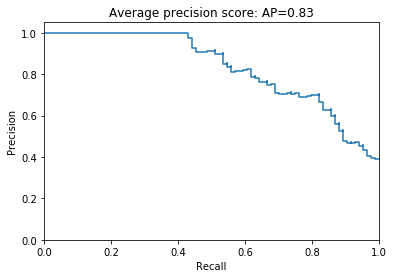

In [12]:
import matplotlib.pyplot as plt

y_prob = logreg.decision_function(X_test) #use this for logistic regression
# y_prob = tree.predict_proba(X_test)[:,1]  #use this for decision tree

precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y_test, y_prob)

plt.figure()
plt.step(recall, precision)
average_precision = sklearn.metrics.average_precision_score(y_test, y_prob)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score: AP={0:0.2f}'.format(average_precision))